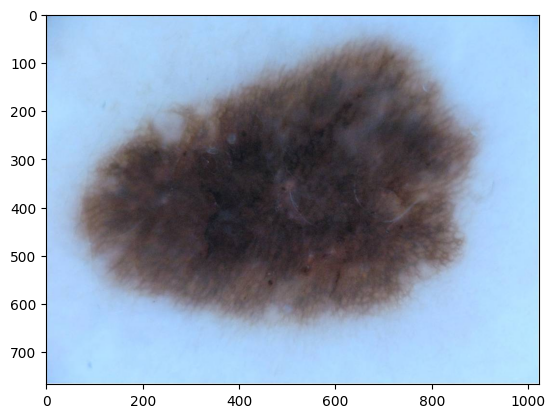

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2 as cv

# import the feature extractor module of pyradiomics
from radiomics import featureextractor
from radiomics import shape2D

import six
import SimpleITK as sitk


# Load an image and mask
img = cv.imread('../../ISIC-2017_Training_Data/ISIC_0000000.jpg',-1) 
mask = cv.imread('../../ISIC-2017_Training_Part1_GroundTruth/ISIC_0000000_segmentation.png',-1)

# Color conversion and normalization
output_array = np.zeros((img.shape[0],img.shape[1])) # Array to store normalized image
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) 

# Show image
plt.imshow(img);

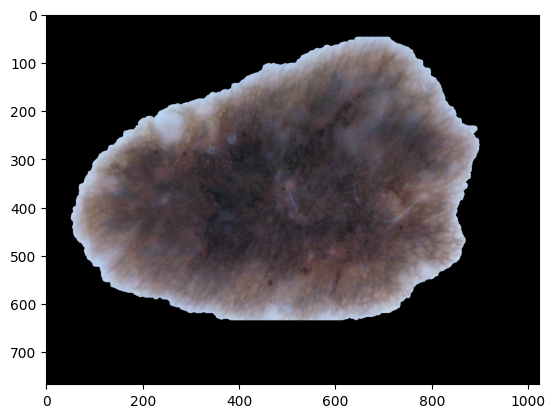

In [2]:
## Segmentation
segmented = cv.normalize(cv.bitwise_and(img, img, mask=mask),  output_array, 0, 255, cv.NORM_MINMAX)
plt.imshow(segmented);

In [3]:
# define the image path (grayscale version [# note: this could be applied to each color channel])
img_gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
cv.imwrite('../pyradiomicsdir/img_gray.jpg',img_gray)
cv.imwrite('../pyradiomicsdir/seg_img.jpg', mask)

# get saved grayscale image
img_path = '../pyradiomicsdir/img_gray.jpg'

# define the mask image path
label_path = '../pyradiomicsdir/seg_img.jpg'

image = sitk.ReadImage(img_path)
mask = sitk.ReadImage(label_path)

In [4]:
# create an instance to extract shapes features from a 2D image
shapeFeatures = shape2D.RadiomicsShape2D(image, mask)
shapeFeatures.enableAllFeatures()

# extract the features
results = shapeFeatures.execute()

In [5]:
# print the features
for (key, val) in six.iteritems(results):
    print('  ', key, ':', val)

   Elongation : 0.6941472863569739
   MajorAxisLength : 1166.5157207336044
   MaximumDiameter : 877.0501696026288
   MeshSurface : 1374.5
   MinorAxisLength : 809.733722039981
   Perimeter : 5028.577628534358
   PerimeterSurfaceRatio : 3.658477721741985
   PixelSurface : 2017.0
   Sphericity : 0.02613558016756285
